<a href="https://colab.research.google.com/github/GiuseppeELio/FRESCO-Board/blob/main/FRESCO_Tdrop_PCool_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following code allows plotting the Data extracted from FRESCO (SD card) and to display the main panels for a Passive Raditive Cooling material(s) analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from tqdm import tqdm
import glob

csvname = glob.glob('*.txt')[0] # from the SD card

df = pd.read_csv(csvname, header=0, index_col=0, skipinitialspace=True, parse_dates=True, dayfirst=True)
pd.to_datetime(df.index)
df.describe()

,TA1,H1,TA2,H2,TA3,H3,TS1,TS2,TS3,TS4,Tbx,Tbr,Ir,TAIR,TSIR,PD0,T0,PD3,T3,Tset1
count,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000
mean,20.213838,55.726496,20.975351,53.761187,21.391861,51.628141,18.336491,18.550418,20.194985,19.431538,22.891853,31.718323,187.422909,21.177973,-5.960165,55.359552,21.171553,48.168864,21.040504,20.213046
std,6.134752,13.473098,6.841419,17.496464,8.523266,9.935291,8.627577,8.676702,9.141799,8.662744,8.512466,6.665411,215.632415,8.074063,3.939520,46.095311,7.624150,39.882928,7.392982,6.135857
min,10.700000,30.300000,10.900000,22.900000,9.400000,33.400000,6.370000,6.480000,7.720000,7.510000,10.270000,21.750000,0.000000,9.310000,-14.250000,0.000000,10.370000,0.000000,10.370000,0.000000
25%,14.800000,43.400000,14.700000,38.200000,13.700000,41.700000,11.080000,11.180000,12.380000,11.980000,15.080000,26.190000,0.000000,14.170000,-9.570000,0.000000,14.580000,0.000000,14.590000,14.800000
50%,19.200000,57.300000,19.700000,54.300000,19.100000,53.500000,15.080000,15.380000,16.880000,16.780000,21.190000,30.000000,21.550000,18.810000,-5.890000,65.570000,19.250000,61.200000,19.190000,19.200000
75%,25.400000,67.200000,27.000000,68.700000,29.300000,60.800000,26.290000,26.710000,28.910000,27.540000,31.060000,36.380000,420.820000,28.830000,-2.630000,95.020000,27.750000,81.260000,27.660000,25.400000
max,31.900000,80.300000,34.200000,88.000000,37.400000,67.100000,35.740000,35.850000,38.310000,36.890000,38.780000,51.560000,608.090000,37.750000,8.750000,221.080000,37.010000,347.430000,35.970000,31.900000


In [2]:
def export_figure(fig, fname, dpi=120, transparent=False):
    """Save figure as PNG or SVG with optional transparency"""
    fig.set_size_inches(30, 18)
    if transparent:
        # For PNG format with transparency
        if fname.endswith('.png'):
            fig.savefig(fname, bbox_inches='tight', dpi=dpi, transparent=True)
            # Convert PNG to RGBA and save again to preserve transparency
            im = Image.open(fname)
            im2 = im.convert('RGBA')
            im2.save(fname, format='PNG')
        # For SVG format with transparency
        elif fname.endswith('.svg'):
            fig.savefig(fname, bbox_inches='tight', dpi=dpi, transparent=True)
    else:
        fig.savefig(fname, bbox_inches='tight', dpi=dpi)

The following lines allows rolling every a certain time (e.g. 1 hour) the entire dataset and in case save the new dataset as csv.

In [3]:
rw = '0.5H'
dfroll = df.rolling(window=rw).mean()
pd.set_option('plotting.backend', 'matplotlib')
dfroll.describe()
#dfroll.to_csv(csvname[:-4] + f'_rw{rw}.csv', decimal=',', sep=';', float_format='%.3f')

,TA1,H1,TA2,H2,TA3,H3,TS1,TS2,TS3,TS4,Tbx,Tbr,Ir,TAIR,TSIR,PD0,T0,PD3,T3,Tset1
count,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000
mean,20.227623,55.684284,20.987657,53.710074,21.409846,51.589185,18.358557,18.574647,20.217491,19.451614,22.901478,31.691960,187.497959,21.194826,-5.937528,55.360533,21.189741,48.169872,21.061283,20.223045
std,6.129220,13.460301,6.837033,17.482265,8.523308,9.942784,8.626150,8.678260,9.140343,8.662746,8.499303,6.600538,214.829355,8.062226,3.885956,44.049522,7.621647,37.511583,7.393081,6.129212
min,10.870304,31.005524,11.001462,23.681603,9.448481,33.760090,6.730214,7.077694,8.075231,7.739134,10.596322,23.274820,0.000000,9.713172,-13.114432,0.000000,10.580484,0.000000,10.624758,0.000000
25%,14.779843,43.393238,14.735086,38.310589,13.743604,41.604306,11.091395,11.209753,12.436243,12.033465,15.001748,26.234913,0.000000,14.182112,-9.539089,0.000000,14.557772,0.000000,14.593596,14.778700
50%,19.255912,57.357578,19.663667,54.071806,19.175901,53.392005,15.048890,15.433626,16.972243,16.782028,21.163979,29.978567,25.637232,18.819087,-5.870745,72.574850,19.224597,60.570765,19.200863,19.253236
75%,25.492624,67.118458,26.973832,68.731245,29.246877,60.788792,26.446543,26.725371,28.880166,27.612252,31.094358,36.318750,421.557883,28.730287,-2.535608,90.522939,27.702274,79.125173,27.698570,25.490453
max,31.656032,79.641104,33.987824,86.244319,37.121421,66.545045,35.388245,35.725214,37.750844,36.545687,37.997917,49.628436,553.094673,36.403948,6.598526,138.068581,36.604252,115.133739,35.858320,31.656144


In [4]:
# the differences between the sample and the ambient temperature measured using the sensor related to the  TA1 data collection
dfroll['ΔT1'] = dfroll['TS1'] - dfroll['TA1']
dfroll['ΔT2'] = dfroll['TS2'] - dfroll['TA1']
dfroll['ΔT3'] = dfroll['TS3'] - dfroll['TA1']
dfroll['ΔT4'] = dfroll['TS4'] - dfroll['TA1']
dfroll['ΔTbx'] = dfroll['Tbx'] - dfroll['TA1']

#If need for example you can do the same considering another temperature measured inside the sample box holder (e.g. TA3)
#dfroll['ΔT1_box'] = dfroll['TS1'] - dfroll['TA3']
#dfroll['ΔT2_box'] = dfroll['TS2'] - dfroll['TA3']
#dfroll['ΔT3_box'] = dfroll['TS3'] - dfroll['TA3']
#dfroll['ΔT4_box'] = dfroll['TS4'] - dfroll['TA3']
#dfroll['ΔTbx_box'] = dfroll['TS4'] - dfroll['Tbx']

#And then consider the differce between two possible "relative ambient temperatures"
#dfroll['ΔT_box'] = dfroll['TA3'] - dfroll['TA1']

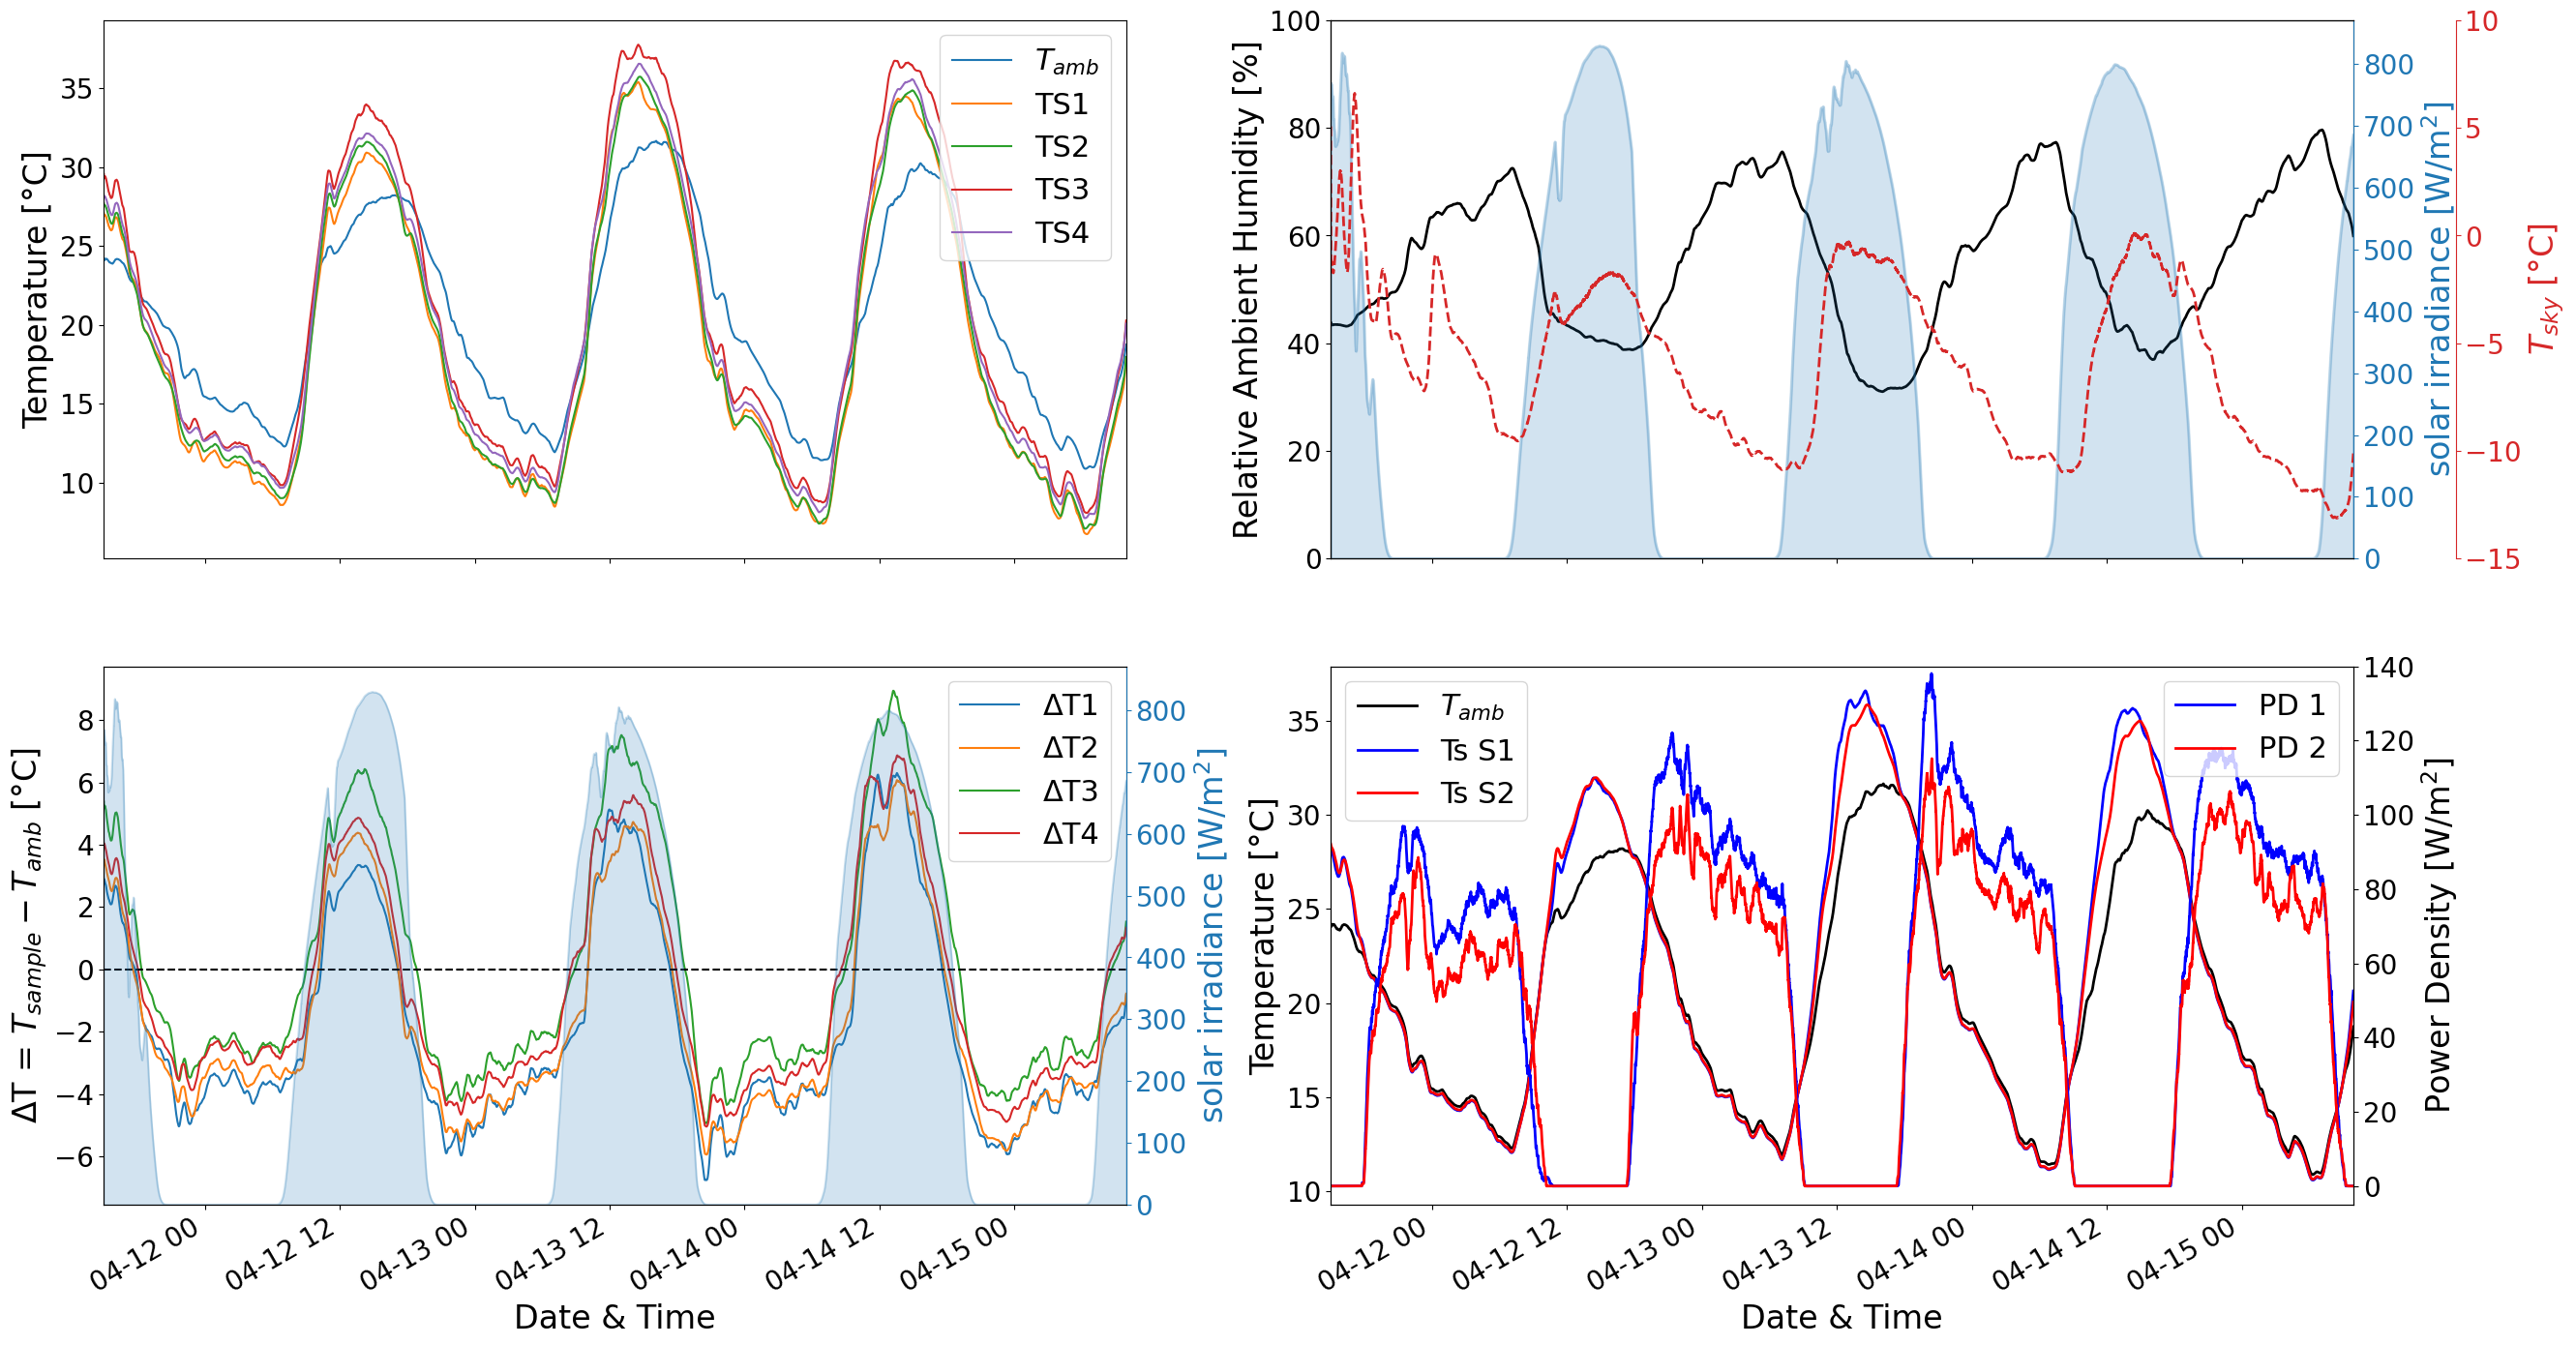

In [5]:
import matplotlib.pyplot as plt
fontsize = 24
fontax = fontsize
fontlab = fontsize - 2
# If needed you can adjust some value such as the irradiance if you system results not well alligned with a weather station
dfroll['Irm'] = dfroll['Ir'] * 1.5

fig, axarr = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(30,18))
#First Plot
dfroll.plot(ax=axarr[0, 0], y=['TA1', 'TS1', 'TS2', 'TS3', 'TS4'])
axarr[0, 0].legend(['$T_{amb}$', 'TS1', 'TS2', 'TS3', 'TS4'], fontsize=fontlab, loc='upper right', ncol=1)
axarr[0, 0].set_ylabel('Temperature [°C]', fontsize=fontax)

#Second Plot
ax_irr = axarr[0, 1].twinx()
dfroll.plot(ax=axarr[0, 1], y=['H1'], ylim=(0, 100), linewidth=2.0, legend=False, color=['black'])
axarr[1, 1].set_xlabel('Date & Time')

dfroll.plot.area(ax=ax_irr, y='Irm', alpha=0.2, legend=False, linewidth=2.0)
ax_irr.set_ylabel('solar irradiance [W/m$^2$]', color='#1f77b4', fontsize=fontax)
ax_irr.spines['right'].set_color('#1f77b4')
ax_irr.tick_params(axis='y', colors='#1f77b4')
axarr[0, 1].set_ylabel('Temperature [°C]', fontsize=fontax)
axarr[0, 1].set_ylabel('Relative Ambient Humidity [%]', fontsize=fontax)

ax_sky = axarr[0, 1].twinx()
dfroll.plot(ax=ax_sky, y='TSIR', ylim=(-15, 10), color='#d62728', legend=False, linewidth=2.0, linestyle='--')
ax_sky.set_ylabel('$T_{sky}$ [°C]', color='#d62728', fontsize=fontax)
ax_sky.spines['right'].set_color('#d62728')
ax_sky.spines['right'].set_position(("axes", 1.1))
ax_sky.tick_params(axis='y', colors='#d62728')

#Third Plot
ax_dif = axarr[1, 0].twinx()
dfroll.plot(ax=axarr[1, 0], y=['ΔT1', 'ΔT2','ΔT3','ΔT4'])
dfroll.plot.area(ax=ax_dif, y='Irm', alpha=0.2, legend=False)
axarr[1, 0].axhline(0, ls='--', c='k')
axarr[1, 0].set_ylabel('ΔT = $T_{sample} - T_{amb}$ [°C]', fontsize=fontax)
ax_dif.set_ylabel('solar irradiance [W/m$^2$]', color='#1f77b4', fontsize = fontax)
axarr[1, 0].set_xlabel('Date & Time', fontsize=fontax)
axarr[1, 0].legend(['ΔT1', 'ΔT2','ΔT3','ΔT4'], fontsize=fontlab, loc='upper right')
ax_dif.spines['right'].set_color('#1f77b4')
ax_dif.tick_params(axis='y', colors='#1f77b4')

#Fourth Plot
dfroll.plot(ax=axarr[1, 1], y=['TA1', 'T0', 'T3'], linewidth=2.0, color=['black', 'blue', 'red'])
axarr[1, 1].set_ylabel('Temperature [°C]', fontsize=fontax)

ax_pow = axarr[1, 1].twinx()
dfroll.plot(ax=ax_pow, y=['PD0', 'PD3'], linewidth=2.0, color=['blue', 'red'])
plt.ylim(-5, 140)
axarr[1, 1].legend(['$P_1$', '$P_2$'], fontsize=fontlab)
axarr[1, 1].set_xlabel('Date & Time', fontsize=fontax)
ax_pow.set_ylabel('Power Density [W/m$^2$]', fontsize=fontax)

axarr[1, 1].legend(['$T_{amb}$', 'Ts S1', 'Ts S2'], fontsize=fontlab, loc='upper left')
ax_pow.legend(['PD 1', 'PD 2'], fontsize=fontlab, loc='upper right')

# Increase font size for tick labels
for ax_row in axarr:
    for ax in ax_row:
        ax.tick_params(axis='both', which='major', labelsize=fontsize-4)
        ax_sky.tick_params(axis='both', which='major', labelsize=fontsize-4)
        ax_irr.tick_params(axis='both', which='major', labelsize=fontsize-4)
        ax_dif.tick_params(axis='both', which='major', labelsize=fontsize-4)
        ax_pow.tick_params(axis='both', which='major', labelsize=fontsize-4)

_ = [axh.autoscale(enable=True, axis='x', tight=True) for axh_row in axarr for axh in axh_row]



export_figure(fig, csvname[:-4] + '_Tdrop_PCool.png')
# Save the figure as SVG
#export_figure(fig, csvname[:-4] + 'Tdrop_PCool.svg', transparent=True)